In [5]:
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import PolynomialFeatures

#New! for Legendre
from scipy.special import legendre
from sklearn.metrics import r2_score #for r-squared


import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib import rc

from tqdm import tqdm

# Set default font to 'Times New Roman'
rc('font', family='Times New Roman')

## Data Pre Processing and Visualization

### Load Data

In [6]:
path = '/Users/Farid/Downloads/woolsey-selected/'

sensor_interest_1 = pd.read_csv('./Data/sensor_interest_1 737433.txt')
print('sensor_interest_1: ', sensor_interest_1.shape)

sensor_interest_2 = pd.read_csv('./Data/sensor_interest_2 764848.txt')
print('sensor_interest_2: ', sensor_interest_2.shape)

sensor_interest_3 = pd.read_csv('./Data/sensor_interest_3 764632.txt')
print('sensor_interest_3: ', sensor_interest_3.shape)

sensor_interest_1:  (13248, 38)
sensor_interest_2:  (13248, 38)
sensor_interest_3:  (13248, 38)


### Visualize the Data

In [7]:
from datetime import datetime, timedelta

# Define the starting date
start_date = datetime(2018, 10, 1)  # start from 1st October 2023

# Define the number of days
n_days = 3

# Create the list of days
days = [(start_date + timedelta(days=i)).strftime('%m/%d') for i in range(n_days)]
print('days: ', days)


days:  ['10/01', '10/02', '10/03']


/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_1274/4105916518.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_1274/4105916518.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_1274/4105916518.py:25: SettingWithCopyWarning: 
A value is tr

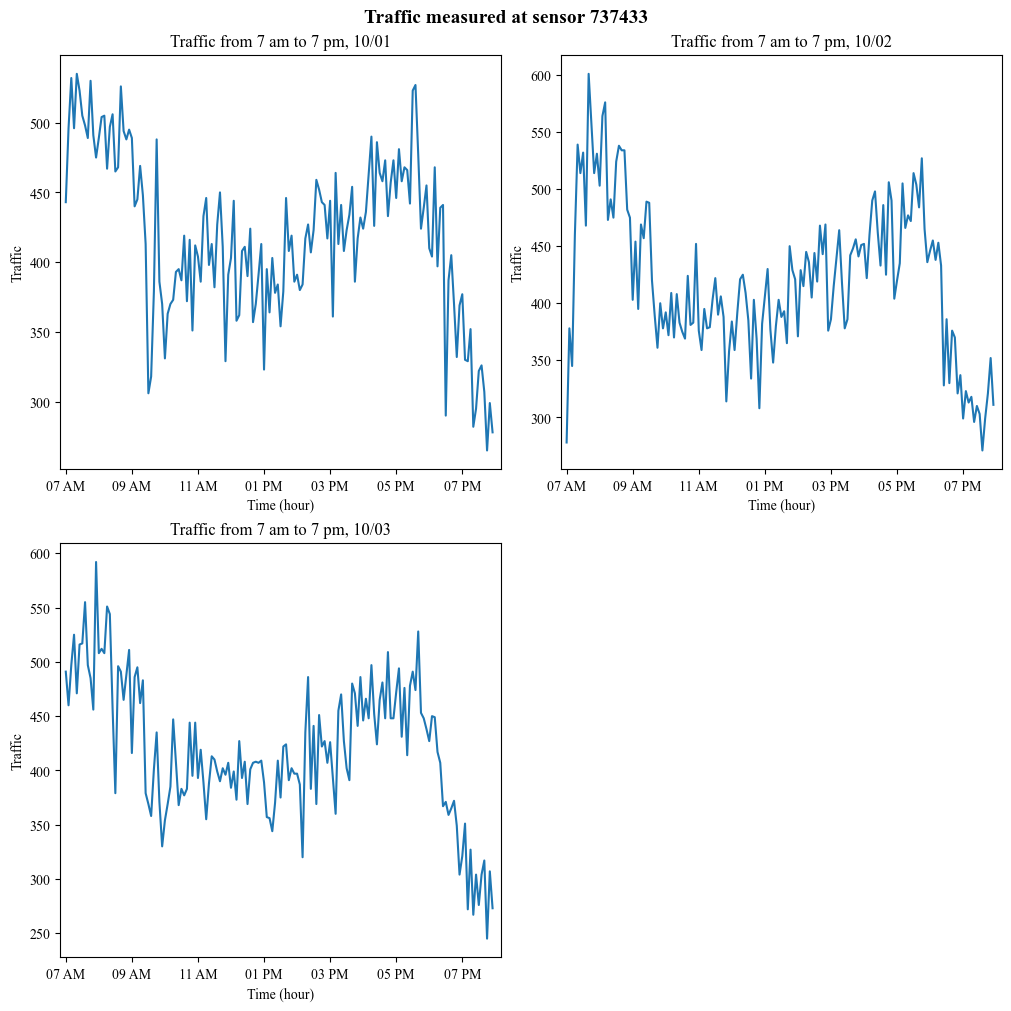

/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_1274/4105916518.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_1274/4105916518.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_1274/4105916518.py:72: SettingWithCopyWarning: 
A value is tr

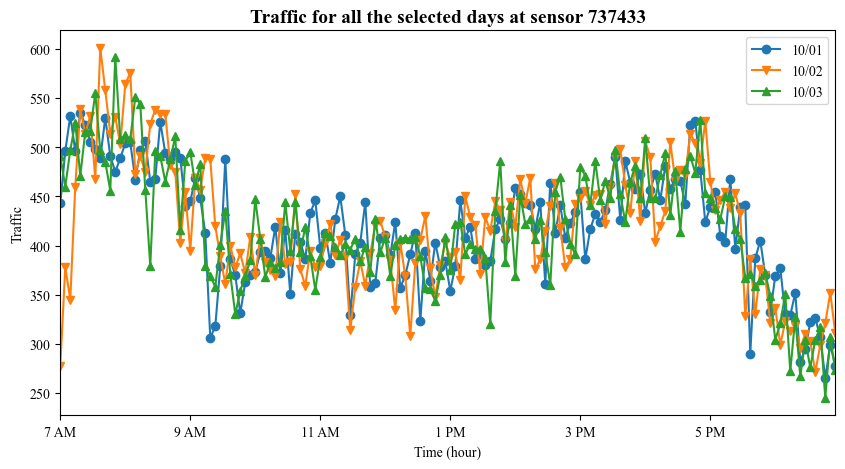

In [8]:

################################################################################################
sensor_interest = sensor_interest_1
sensor_id = 737433
################################################################################################


#####   Subplots
#####


# Calculate number of rows required for subplots
n = len(days)
nrows = n // 2 if n % 2 == 0 else n // 2 + 1

# Initialize figure and axes for subplots
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(10, nrows*5), constrained_layout=True)
axs = axs.flatten()  # flatten array to make indexing easier

fig.suptitle(f'Traffic measured at sensor {sensor_id}', fontsize=14, weight='bold')

for i, day in enumerate(days):
    ax = axs[i]  # current subplot

    time_series_data = sensor_interest[sensor_interest['Time'].str.startswith(day)]
    time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])

    # Filter out data outside of 7 AM to 7 PM
    time_series_data = time_series_data[(time_series_data['Time'].dt.hour >= 7) & (time_series_data['Time'].dt.hour <= 19)]

    # y values
    traffic = time_series_data['10']

    # x values - use 'Time' values
    time = time_series_data['Time']

    # Create scatter plot
    ax.plot(time, traffic)

    # Set x-axis format and locator
    hours = mdates.DateFormatter('%I %p')
    hour_locator = mdates.HourLocator(interval=2)  # put a tick on every 2 hours
    ax.xaxis.set_major_locator(hour_locator)
    ax.xaxis.set_major_formatter(hours)

    # Adjust x limits to start slightly before 7 AM and end at 7 PM
    start_time = time.min().replace(hour=6, minute=50, second=0)  # 10 minutes before 7 AM
    end_time = time.max().replace(hour=20, minute=10, second=0)
    ax.set_xlim(start_time, end_time)

    # Set axis titles
    ax.set_xlabel('Time (hour)')
    ax.set_ylabel('Traffic')
    ax.set_title('Traffic from 7 am to 7 pm, '+day)

# If there are more subplots than days (i.e. an even number of subplots), remove the extra one
if len(days) % 2 != 0:
    fig.delaxes(axs[-1])  

plt.show()

#####   Additional 1-plot
#####


# Define a list of markers
markers = ['o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', '.', ',']

fig, ax = plt.subplots(figsize=(10, 5))

for i, day in enumerate(days):
    time_series_data = sensor_interest[sensor_interest['Time'].str.startswith(day)]
    time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])

    # Filter out data outside of 7 AM to 7 PM
    time_series_data = time_series_data[(time_series_data['Time'].dt.hour >= 7) & (time_series_data['Time'].dt.hour <= 19)]

    # y values
    traffic = time_series_data['10']

    # Plot the data for all series with different markers for each day
    if n_days < 10:
        ax.plot(np.arange(len(traffic)), traffic, label=day, marker=markers[i%len(markers)])
    else:
        ax.plot(np.arange(len(traffic)), traffic, label=day)  # Use modulus to prevent out of index errors

# Set x-axis ticks and labels
x_ticks = np.linspace(0, len(traffic), 7)  # generate 7 evenly spaced x-axis locations
time_labels = ['7 AM', '9 AM', '11 AM', '1 PM', '3 PM', '5 PM', '7 PM']  # corresponding time labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(time_labels)

# Adjust x limits to start slightly before 7 AM and end at 7 PM
start_time = np.arange(len(traffic)).min()  # 10 minutes before 7 AM
end_time = np.arange(len(traffic)).max()  # 10 minutes after 7 PM
ax.set_xlim(start_time, end_time)

# Set labels and title for the combined plot
ax.set_xlabel('Time (hour)')
ax.set_ylabel('Traffic')
ax.set_title(f'Traffic for all the selected days at sensor {sensor_id}', fontsize=14, weight='bold')
ax.legend()

plt.show()

/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_1274/1469223246.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])


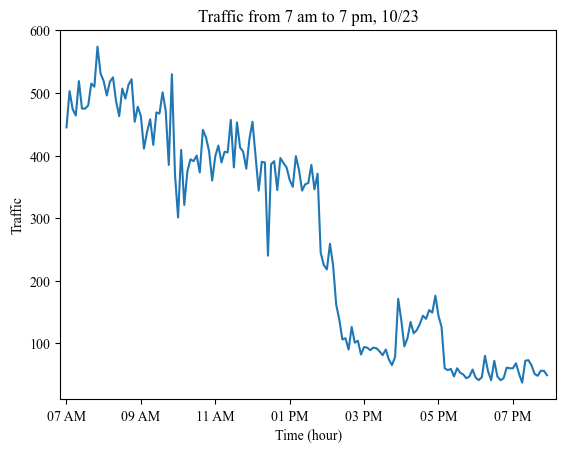

In [9]:
day = "10/23"
################################################################################################


time_series_data = sensor_interest[sensor_interest['Time'].str.startswith(day)]

# Ensure 'Time' column is in datetime format
time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])

# Filter out data outside of 7 AM to 7 PM
time_series_data = time_series_data[(time_series_data['Time'].dt.hour >= 7) & (time_series_data['Time'].dt.hour <= 19)]

# y values
traffic = time_series_data['10']

# x values - use 'Time' values
time = time_series_data['Time']

fig, ax = plt.subplots()

# Create scatter plot
ax.plot(time, traffic)

# Set x-axis format and locator
hours = mdates.DateFormatter('%I %p')
hour_locator = mdates.HourLocator(interval=2)  # put a tick on every 2 hours
ax.xaxis.set_major_locator(hour_locator)
ax.xaxis.set_major_formatter(hours)

# Adjust x limits to start slightly before 7 AM and end at 7 PM
start_time = time.min().replace(hour=6, minute=50, second=0)  # 10 minutes before 7 AM
end_time = time.max().replace(hour=20, minute=10, second=0)
ax.set_xlim(start_time, end_time)

# Set axis titles
ax.set_xlabel('Time (hour)')
ax.set_ylabel('Traffic')
ax.set_title('Traffic from 7 am to 7 pm, '+day)

plt.show()


# Traffic Prediction

## Functions

In [10]:
def generate_multi_legendre_design_matrix_(x_initial, polynomial_order):
    if np.isscalar(x_initial):
        x_initial = np.array([[x_initial]])

    # Ensure x_initial is a 2D numpy array
    x_initial = np.atleast_2d(x_initial)
    

    # N is the number of observations,      num_vars is the number of input variables
    N, n_input_vars = x_initial.shape

    # Number of terms in the expansion for each variable (x1^0, x1^1, x1^2, ...)
    n_expansion_terms = polynomial_order + 1

    # Total number of terms in the expansion
    total_expansion_terms = n_expansion_terms ** n_input_vars

    # Initialize design matrix
    design_matrix = np.empty((N, total_expansion_terms), dtype='float64')

    # Loop over each data point
    for i in range(N):
        col_index = 0 # just a counter
        # Loop over all combinations of polynomial orders for each variable
        for terms in np.ndindex(*([n_expansion_terms]*n_input_vars)): ######## CHECK
            product = 1.0
            # Calculate the product of Legendre polynomials for this combination of terms
            for var in range(n_input_vars):
                P_j = legendre(terms[var])
                product *= P_j(x_initial[i, var])
            # Store result in the design matrix
            design_matrix[i, col_index] = product
            col_index += 1
            

    return design_matrix

In [11]:
####                                                                               ####
####                                                                               ####
#### This one goes up until the parameters that do not exceed the polynomial order ####
####                                                                               ####
####                                                                               ####

import numpy as np
from numpy.polynomial.legendre import Legendre
from sklearn.preprocessing import MinMaxScaler

def generate_multi_legendre_design_matrix(x_initial, polynomial_order):
    x_initial = np.atleast_2d(x_initial)
    n_input_vars = x_initial.shape[1]
    
    # Generate multi-index for which the sum of the indices is <= polynomial_order
    indices = np.indices((polynomial_order + 1,) * n_input_vars).reshape(n_input_vars, -1)
    indices = indices[:, np.sum(indices, axis=0) <= polynomial_order]
    
    # Initialize design matrix
    design_matrix = np.empty((x_initial.shape[0], indices.shape[1]), dtype='float64')


    # Compute product of variables raised to the power of indices
    for row in range(x_initial.shape[0]):
        for col, idx in enumerate(indices.T):
            product = 1
            for var, power in enumerate(idx):
                if power != 0:
                    P_j = Legendre.basis(deg=power)
                    product *= P_j(x_initial[row, var])
                else:
                    product *= 1
            design_matrix[row, col] = product
            
    return design_matrix

In [12]:
xx = np.array([[1,2],[1,2],[1,2]])
print('xx: ', xx)

print('generate_multi_legendre_design_matrix_:\n', generate_multi_legendre_design_matrix_(xx,2))
print('\ngenerate_multi_legendre_design_matrix:\n', generate_multi_legendre_design_matrix(xx,2))

print('\ngenerate_multi_legendre_design_matrix_: ', generate_multi_legendre_design_matrix_(xx,2).shape)
print('\ngenerate_multi_legendre_design_matrix: ', generate_multi_legendre_design_matrix(xx,2).shape)


xx:  [[1 2]
 [1 2]
 [1 2]]
generate_multi_legendre_design_matrix_:
 [[1.  2.  5.5 1.  2.  5.5 1.  2.  5.5]
 [1.  2.  5.5 1.  2.  5.5 1.  2.  5.5]
 [1.  2.  5.5 1.  2.  5.5 1.  2.  5.5]]

generate_multi_legendre_design_matrix:
 [[1.  2.  5.5 1.  2.  1. ]
 [1.  2.  5.5 1.  2.  1. ]
 [1.  2.  5.5 1.  2.  1. ]]

generate_multi_legendre_design_matrix_:  (3, 9)

generate_multi_legendre_design_matrix:  (3, 6)


### Predictive Algorithm

In [13]:
def online_kaczmarz_legendre_multiple(x_initial, test_y, polynomial_order, weights=None):

    # Initialize MinMaxScaler to normalize to range [-1,1]
    #scaler = MinMaxScaler(feature_range=(-1, 1))
    # x_initial = ( x_initial - x_initial.min() ) / ( x_initial.max() - x_initial.min() )

    design_matrix = generate_multi_legendre_design_matrix(x_initial, polynomial_order)

    if weights is None:
        # initialize the weights to be the number of columns in the design matrix
        weight_predictions = np.random.rand(design_matrix.shape[1])
    else:
        weight_predictions = weights

    beta_parameter = 0


    for i in range (design_matrix.shape[0]):
        a = design_matrix[i, :]
        
        weight_predictions = weight_predictions + ((test_y[i] - np.dot(a, weight_predictions)) / np.linalg.norm(a)**2) * a.T



        # This is for beta
        # Note: you may want to uncomment this if you want to compute beta_parameter
        # residual_errors = target_values - design_matrix @ weight_predictions
        # sse = residual_errors.T @ residual_errors
        # beta_parameter = sse / ( - polynomial_order)

    return weight_predictions, beta_parameter

## 1. Sensor 737433 (traffic increase after fire)

### Load the data of the sensor of interest, and the m closest sensors.

In [14]:
## m=4

sensor_1_ = pd.read_csv('./Data/sensor_interest_1 737433.txt')
print('sensor_1: ', sensor_1_.shape)


sensor_1_m_1_ = pd.read_csv('./Data/sensor_1_m_8 772564.txt')
sensor_1_m_2_ = pd.read_csv('./Data/sensor_1_m_9 775975.txt')
sensor_1_m_3_ = pd.read_csv('./Data/sensor_1_m_11 775961.txt')
sensor_1_m_4_ = pd.read_csv('./Data/sensor_1_m_14 775949.txt')

sensor_1:  (13248, 38)


### Filter out the measurements that are outside the time intervals of interest.
We want to see the measurements from   **_7 am to 7 pm_** and **week days** only.

In [15]:
# Ensure 'Time' column is in datetime format
sensor_1_['Time'] = pd.to_datetime(sensor_1_['Time'])
sensor_1_m_1_['Time'] = pd.to_datetime(sensor_1_m_1_['Time'])
sensor_1_m_2_['Time'] = pd.to_datetime(sensor_1_m_2_['Time'])
sensor_1_m_3_['Time'] = pd.to_datetime(sensor_1_m_3_['Time'])
sensor_1_m_4_['Time'] = pd.to_datetime(sensor_1_m_4_['Time'])

# Filter out data outside of 7 AM to 7 PM and data from weekends
sensor_1 = sensor_1_[(sensor_1_['Time'].dt.hour >= 7) & (sensor_1_['Time'].dt.hour < 19) & (sensor_1_['Time'].dt.dayofweek < 5)]
sensor_1_m_1 = sensor_1_m_1_[(sensor_1_m_1_['Time'].dt.hour >= 7) & (sensor_1_m_1_['Time'].dt.hour < 19) & (sensor_1_m_1_['Time'].dt.dayofweek < 5)]
sensor_1_m_2 = sensor_1_m_2_[(sensor_1_m_2_['Time'].dt.hour >= 7) & (sensor_1_m_2_['Time'].dt.hour < 19) & (sensor_1_m_2_['Time'].dt.dayofweek < 5)]
sensor_1_m_3 = sensor_1_m_3_[(sensor_1_m_3_['Time'].dt.hour >= 7) & (sensor_1_m_3_['Time'].dt.hour < 19) & (sensor_1_m_3_['Time'].dt.dayofweek < 5)]
sensor_1_m_4 = sensor_1_m_4_[(sensor_1_m_4_['Time'].dt.hour >= 7) & (sensor_1_m_4_['Time'].dt.hour < 19) & (sensor_1_m_4_['Time'].dt.dayofweek < 5)]

# Sort by date
sensor_1_['Time'] = pd.to_datetime(sensor_1_['Time'])
sensor_1_m_1_['Time'] = pd.to_datetime(sensor_1_m_1_['Time'])
sensor_1_m_2_['Time'] = pd.to_datetime(sensor_1_m_2_['Time'])
sensor_1_m_3_['Time'] = pd.to_datetime(sensor_1_m_3_['Time'])
sensor_1_m_4_['Time'] = pd.to_datetime(sensor_1_m_4_['Time'])


# Reset the indices
sensor_1 = sensor_1.reset_index(drop=True)
sensor_1_m_1 = sensor_1_m_1.reset_index(drop=True)
sensor_1_m_2 = sensor_1_m_2.reset_index(drop=True)
sensor_1_m_3 = sensor_1_m_3.reset_index(drop=True)
sensor_1_m_4 = sensor_1_m_4.reset_index(drop=True)

print('sensor_1: ', sensor_1.shape)
print('sensor_1_m_1: ', sensor_1_m_1.shape)
print('sensor_1_m_2: ', sensor_1_m_2.shape)
print('sensor_1_m_3: ', sensor_1_m_3.shape)
print('sensor_1_m_4: ', sensor_1_m_4.shape)

sensor_1:  (4896, 38)
sensor_1_m_1:  (4895, 38)
sensor_1_m_2:  (4896, 38)
sensor_1_m_3:  (4896, 34)
sensor_1_m_4:  (4896, 34)


In [16]:
# Select only column '10' and convert to list to prepare for reshaping
sensor_1_10 = sensor_1['10'].tolist()
sensor_1_m_1_10 = sensor_1_m_1['10'].tolist()
sensor_1_m_2_10 = sensor_1_m_2['10'].tolist()
sensor_1_m_3_10 = sensor_1_m_3['10'].tolist()
sensor_1_m_4_10 = sensor_1_m_4['10'].tolist()

# Ensure each list is of length divisible by 3 by trimming
def trim_to_multiple(lst, multiple):
    return lst[:len(lst)//multiple*multiple]

sensor_1_10 = trim_to_multiple(sensor_1_10, 3)
sensor_1_m_1_10 = trim_to_multiple(sensor_1_m_1_10, 3)
sensor_1_m_2_10 = trim_to_multiple(sensor_1_m_2_10, 3)
sensor_1_m_3_10 = trim_to_multiple(sensor_1_m_3_10, 3)
sensor_1_m_4_10 = trim_to_multiple(sensor_1_m_4_10, 3)

# Reshape list and convert back to DataFrame, then sum every 3 rows
sensor_1 = pd.DataFrame(np.array(sensor_1_10).reshape(-1,3)).sum(axis=1)
sensor_1_m_1 = pd.DataFrame(np.array(sensor_1_m_1_10).reshape(-1,3)).sum(axis=1)
sensor_1_m_2 = pd.DataFrame(np.array(sensor_1_m_2_10).reshape(-1,3)).sum(axis=1)
sensor_1_m_3 = pd.DataFrame(np.array(sensor_1_m_3_10).reshape(-1,3)).sum(axis=1)
sensor_1_m_4 = pd.DataFrame(np.array(sensor_1_m_4_10).reshape(-1,3)).sum(axis=1)

print('sensor_1_10: ', sensor_1.shape)
print('sensor_1_m_1_10: ', sensor_1_m_1.shape)
print('sensor_1_m_2_10: ', sensor_1_m_2.shape)
print('sensor_1_m_3_10: ', sensor_1_m_3.shape)
print('sensor_1_m_4_10: ', sensor_1_m_4.shape)

sensor_1_10:  (1632,)
sensor_1_m_1_10:  (1631,)
sensor_1_m_2_10:  (1632,)
sensor_1_m_3_10:  (1632,)
sensor_1_m_4_10:  (1632,)


### Generate the matrix as per the specifications in the paper.
Each row will have the measurements of traffic from the sensor of interest and the m-closest sensors.
- The rows will include traffic information of the t-1, t-2,..., t-r observations.
- The rows are organized by sensor, and by timestep: 
<br><br>[sensor of interest @ t-1,...,sensor of interest @ t-r, ... , m-closest sensor @ t-1,...,m-closest sensor @ t-r]

In [17]:
r = 3  # set r to any value

# Minimum number of rows across all dataframes
min_rows = min(sensor_1.shape[0], sensor_1_m_1.shape[0], sensor_1_m_2.shape[0], sensor_1_m_3.shape[0], sensor_1_m_4.shape[0])

# Initialize an empty list to store all row vectors
row_vectors = []

# Iterate over each index from r to min_rows
for i in tqdm(range(r, min_rows)):
    # Generate a list of indexes you're interested in. In this case, it's [i-r, i-r+1, ..., i]
    
    ind = list(range(i+1, i-r, -1))
    indexes = list(range(i, i-r, -1))

    
    # Get the desired elements
    sensor_1_traffic = sensor_1.loc[ind].values
    sensor_1_m_1_traffic = sensor_1_m_1.loc[indexes].values
    sensor_1_m_2_traffic = sensor_1_m_2.loc[indexes].values
    sensor_1_m_3_traffic = sensor_1_m_3.loc[indexes].values
    sensor_1_m_4_traffic = sensor_1_m_4.loc[indexes].values
    
    # Concatenate them into a 1xr*5 row vector
    row_vector = np.concatenate([sensor_1_traffic, sensor_1_m_1_traffic, sensor_1_m_2_traffic, sensor_1_m_3_traffic, sensor_1_m_4_traffic])
    
    # Append the row vector to our list
    row_vectors.append(row_vector)

# Convert our list of row vectors into a 2D numpy array
traffic_737433 = pd.DataFrame(row_vectors)
traffic_737433


  0%|          | 0/1628 [00:00<?, ?it/s]

100%|██████████| 1628/1628 [00:02<00:00, 644.78it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1498.0,1496.0,1492.0,1554.0,1356.0,1427.0,1341.0,227.0,194.0,226.0,177.0,167.0,182.0,226.0,214.0,286.0
1,1470.0,1498.0,1496.0,1492.0,1262.0,1356.0,1427.0,234.0,227.0,194.0,175.0,177.0,167.0,211.0,226.0,214.0
2,1459.0,1470.0,1498.0,1496.0,1473.0,1262.0,1356.0,244.0,234.0,227.0,206.0,175.0,177.0,238.0,211.0,226.0
3,1477.0,1459.0,1470.0,1498.0,1411.0,1473.0,1262.0,281.0,244.0,234.0,194.0,206.0,175.0,203.0,238.0,211.0
4,1374.0,1477.0,1459.0,1470.0,1434.0,1411.0,1473.0,223.0,281.0,244.0,198.0,194.0,206.0,198.0,203.0,238.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1280.0,1368.0,1327.0,1085.0,1161.0,1245.0,1006.0,486.0,591.0,623.0,309.0,401.0,365.0,307.0,227.0,211.0
1624,1218.0,1280.0,1368.0,1327.0,1072.0,1161.0,1245.0,567.0,486.0,591.0,425.0,309.0,401.0,212.0,307.0,227.0
1625,1186.0,1218.0,1280.0,1368.0,894.0,1072.0,1161.0,464.0,567.0,486.0,388.0,425.0,309.0,192.0,212.0,307.0
1626,1096.0,1186.0,1218.0,1280.0,1100.0,894.0,1072.0,429.0,464.0,567.0,344.0,388.0,425.0,137.0,192.0,212.0


### Tests - Sensor 737433

#### Estimation

In [18]:

################################################################################################
####    Definition of "Hyperparameters"
################################################################################################

t = 48*30 # 48 = amount of 15 minutes traffic observations per day, 30 = 11/09/2018 
# t = traffic_737433.shape[0]


X = traffic_737433.iloc[:t, 1:]

"""
    Update this if using more input variables, # the function is handling a 15-dimensional, second order polynomial.
"""

polynomial_degree = 2
"""
    USING Total (vs. Max) EXPANCTION TERMS
    Number of terms in the weights matrix: 

"""


target_values = traffic_737433.iloc[:t, 0]     
# Generate Y as target_values (real Y's)

# Initialize weights and estimations 
weights_over_time = []
y_hat = []


noise = np.random.normal(scale= 10 , size=(t))

################################################################################################
####    Online estimation of coefficients
################################################################################################


for i in tqdm(range(t)):
    x_i = X.iloc[i, :]

    # Normalize and scale to -1,1 the input:
    x_i = ( x_i - x_i.min() ) / ( x_i.max() - x_i.min() )*2 - 1
    
    weight_predictions, _ = online_kaczmarz_legendre_multiple(x_i, [target_values[i] + noise[i]], polynomial_degree)
    
    #De-normalize rescale the weights:
    weight_predictions = (((weight_predictions + 1) / 2)  * ( x_i.max() - x_i.min() ) + x_i.min() )

    # Use predicted weights to compute y_hat
    y_predictions = generate_multi_legendre_design_matrix(x_i, polynomial_degree) @ weight_predictions.T 

    # Store the values of predicted y and estimated weights
    y_hat.append(y_predictions)
    weights_over_time.append(weight_predictions)


  4%|▎         | 53/1440 [02:27<1:03:50,  2.76s/it]

In [ ]:
weights_over_time_1 = np.array(weights_over_time)
weights_over_time_1.to_csv('./Data'+ 'weights_over_time_1.csv')

y_hat_1 = np.array(y_hat).flatten() #########
y_hat_1.to_csv('./Data'+ 'y_hat_1.csv')

print('y_hat: ', y_hat_1.shape)
print('weights_over_time: ', weights_over_time_1.shape)

weights_over_time_1[-1]
print('Weights: ', weights_over_time_1[-1].shape)

y_hat:  (1440,)
weights_over_time:  (1440, 136)
Weights:  (136,)


#### Results

In [ ]:
################################################################################################
####    Results
################################################################################################

print('Predicted_Values: ', y_hat_1.shape)

y_1 = traffic_737433.iloc[:t, 0] 
print('Real_Values: ', y_1.shape)

Y_1 = pd.DataFrame({
    'Predicted_Values': y_hat_1,
    'Real_Values': y_1,
    'Difference': (y_1-y_hat_1).T
})

# Style DataFrame
Y_1[-10:].style.format("{:.4f}")

Predicted_Values:  (1440,)
Real_Values:  (1440,)


,Predicted_Values,Real_Values,Difference
1430,1438.1778,1434.0000,-4.1778
1431,1271.6218,1260.0000,-11.6218
1432,1270.6403,1272.0000,1.3597
1433,1280.1389,1275.0000,-5.1389
1434,1154.2831,1151.0000,-3.2831
1435,1127.8693,1128.0000,0.1307
1436,1426.5583,1431.0000,4.4417
1437,1539.3770,1526.0000,-13.3770
1438,1554.6167,1556.0000,1.3833
1439,1554.6395,1552.0000,-2.6395


#### Plots

r2:  0.9971831736110347


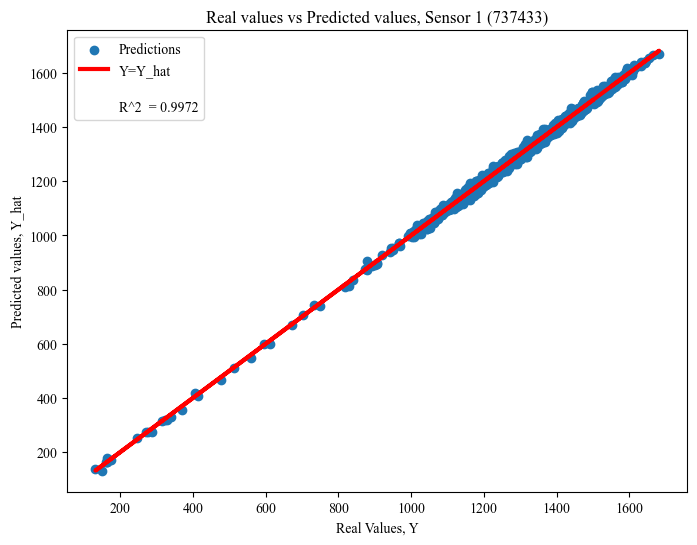

In [ ]:
# Plot the accuracy
plt.figure(figsize=(8, 6))

r2 = r2_score(y_1, y_hat_1)
print('r2: ', r2)

plt.scatter(y_1, y_hat_1, label='Predictions') # Scatter plot of real vs estimated y
plt.plot(y_1, y_1, color='red', linewidth = 3, label=f'Y=Y_hat') # Straight line on Y=Y
plt.scatter(y_1, y_1, marker='', label=f'\nR^2  = {r2:.4f}')

plt.xlabel('Real Values, Y')
plt.ylabel('Predicted values, Y_hat')
plt.title('Real values vs Predicted values, Sensor 1 (737433)')
plt.legend()

plt.show() 


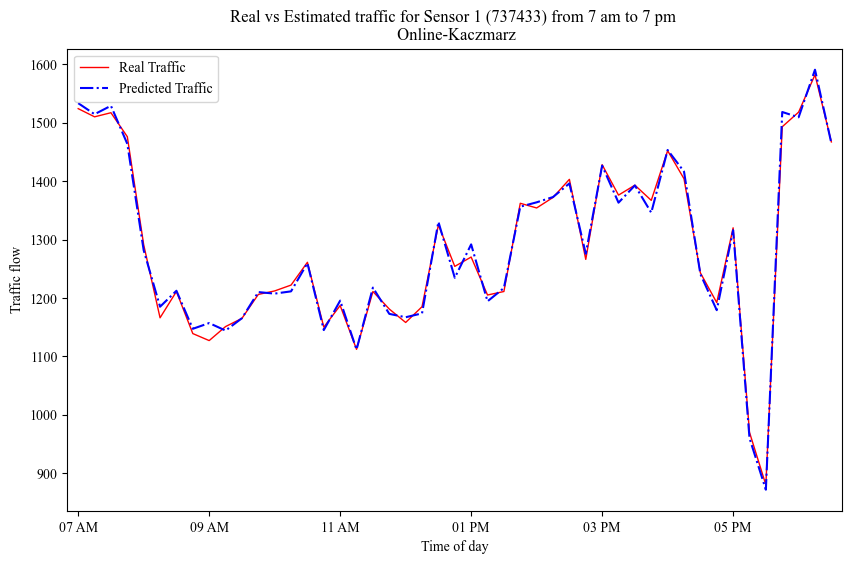

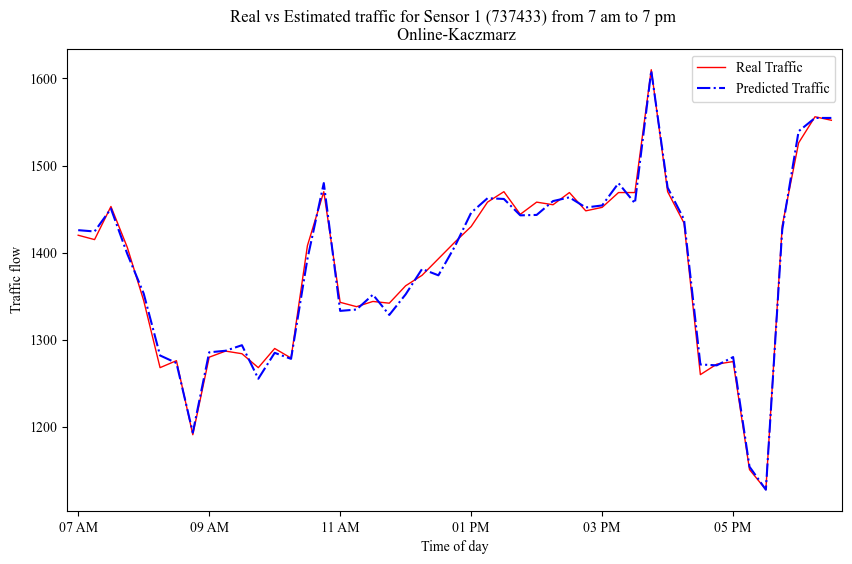

In [ ]:
## Day Before Ignition

# Extract data and generate time values
# n = int(t / days)
n = 28 # Corresponds to the 7 of November, 2018

num_entries = len(Y_1['Real_Values'][(48*(n-1)+1):48*(n)])
time_range = pd.date_range(start='7:00', end='19:00', freq='15min')
time_values = np.tile(time_range, num_entries // len(time_range) + 1)[:num_entries]

# Prepare plot data
plot_df = pd.DataFrame({
    'Time': time_values,
    'Real_Values': Y_1['Real_Values'][(48*(n-1)+1):48*(n)].values,
    'Predicted_Values': Y_1['Predicted_Values'][(48*(n-1)+1):48*(n)].values
})

# Plot data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot('Time', 'Real_Values', data=plot_df, linewidth=1, color='red', label='Real Traffic')
ax.plot('Time', 'Predicted_Values', data=plot_df, linestyle='dashdot', label='Predicted Traffic', color='b')


# Set x-axis format and locator
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Set x limits and titles
ax.set_xlim(plot_df['Time'].min() - pd.Timedelta(minutes=10), plot_df['Time'].max() + pd.Timedelta(minutes=10))
ax.set(xlabel='Time of day', ylabel='Traffic flow', title='Real vs Estimated traffic for Sensor 1 (737433) from 7 am to 7 pm \n Online-Kaczmarz')
ax.legend()

plt.savefig('./Figures/before ignition - Increase.png')

plt.show()



## Day After Ignition

# Extract data and generate time values
# n = int(t / days)
n = 30 # Corresponds to the 9 of November, 2018

num_entries = len(Y_1['Real_Values'][(48*(n-1)+1):48*(n)])
time_range = pd.date_range(start='7:00', end='19:00', freq='15min')
time_values = np.tile(time_range, num_entries // len(time_range) + 1)[:num_entries]

# Prepare plot data
plot_df = pd.DataFrame({
    'Time': time_values,
    'Real_Values': Y_1['Real_Values'][(48*(n-1)+1):48*(n)].values,
    'Predicted_Values': Y_1['Predicted_Values'][(48*(n-1)+1):48*(n)].values
})

# Plot data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot('Time', 'Real_Values', data=plot_df, linewidth=1, color='red', label='Real Traffic')
ax.plot('Time', 'Predicted_Values', data=plot_df, linestyle='dashdot', label='Predicted Traffic', color='b')


# Set x-axis format and locator
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Set x limits and titles
ax.set_xlim(plot_df['Time'].min() - pd.Timedelta(minutes=10), plot_df['Time'].max() + pd.Timedelta(minutes=10))
ax.set(xlabel='Time of day', ylabel='Traffic flow', title='Real vs Estimated traffic for Sensor 1 (737433) from 7 am to 7 pm \n Online-Kaczmarz')
ax.legend()

plt.savefig('./Figures/after ignition - Increase.png')

plt.show()

## 2. Sensor 764848 (traffic decrease after fire)

### Load the data of the sensor of interest, and the m closest sensors.

In [ ]:
## m=4

sensor_2_ = pd.read_csv('./Data/sensor_interest_2 764848.txt')
print('sensor_2: ', sensor_2_.shape)


sensor_2_m_1_ = pd.read_csv('./Data/sensor_2_m_2 771475.txt')
sensor_2_m_2_ = pd.read_csv('./Data/sensor_2_m_4 771410.txt')
sensor_2_m_3_ = pd.read_csv('./Data/sensor_2_m_7 771421.txt')
sensor_2_m_4_ = pd.read_csv('./Data/sensor_2_m_9 771463.txt')


sensor_2:  (13248, 38)


### Filter out the measurements that are outside the time intervals of interest.
We want to see the measurements from   **_7 am to 7 pm_**

In [ ]:
# Ensure 'Time' column is in datetime format
sensor_2_['Time'] = pd.to_datetime(sensor_2_['Time'])
sensor_2_m_1_['Time'] = pd.to_datetime(sensor_2_m_1_['Time'])
sensor_2_m_2_['Time'] = pd.to_datetime(sensor_2_m_2_['Time'])
sensor_2_m_3_['Time'] = pd.to_datetime(sensor_2_m_3_['Time'])
sensor_2_m_4_['Time'] = pd.to_datetime(sensor_2_m_4_['Time'])

# Filter out data outside of 7 AM to 7 PM and data from weekends
sensor_2 = sensor_2_[(sensor_2_['Time'].dt.hour >= 7) & (sensor_2_['Time'].dt.hour < 19) & (sensor_2_['Time'].dt.dayofweek < 5)]
sensor_2_m_1 = sensor_2_m_1_[(sensor_2_m_1_['Time'].dt.hour >= 7) & (sensor_2_m_1_['Time'].dt.hour < 19) & (sensor_2_m_1_['Time'].dt.dayofweek < 5)]
sensor_2_m_2 = sensor_2_m_2_[(sensor_2_m_2_['Time'].dt.hour >= 7) & (sensor_2_m_2_['Time'].dt.hour < 19) & (sensor_2_m_2_['Time'].dt.dayofweek < 5)]
sensor_2_m_3 = sensor_2_m_3_[(sensor_2_m_3_['Time'].dt.hour >= 7) & (sensor_2_m_3_['Time'].dt.hour < 19) & (sensor_2_m_3_['Time'].dt.dayofweek < 5)]
sensor_2_m_4 = sensor_2_m_4_[(sensor_2_m_4_['Time'].dt.hour >= 7) & (sensor_2_m_4_['Time'].dt.hour < 19) & (sensor_2_m_4_['Time'].dt.dayofweek < 5)]

# Sort by date
sensor_2 = sensor_2.sort_values(by='Time')
sensor_2_m_1 = sensor_2_m_1.sort_values(by='Time')
sensor_2_m_2 = sensor_2_m_2.sort_values(by='Time')
sensor_2_m_3 = sensor_2_m_3.sort_values(by='Time')
sensor_2_m_4 = sensor_2_m_4.sort_values(by='Time')

# Reset the indices
sensor_2 = sensor_2.reset_index(drop=True)
sensor_2_m_1 = sensor_2_m_1.reset_index(drop=True)
sensor_2_m_2 = sensor_2_m_2.reset_index(drop=True)
sensor_2_m_3 = sensor_2_m_3.reset_index(drop=True)
sensor_2_m_4 = sensor_2_m_4.reset_index(drop=True)

print('sensor_2: ', sensor_2.shape)
print('sensor_2_m_1: ', sensor_2_m_1.shape)
print('sensor_2_m_2: ', sensor_2_m_2.shape)
print('sensor_2_m_3: ', sensor_2_m_3.shape)
print('sensor_2_m_4: ', sensor_2_m_4.shape)

sensor_2:  (4896, 38)
sensor_2_m_1:  (4896, 34)
sensor_2_m_2:  (4896, 34)
sensor_2_m_3:  (4896, 34)
sensor_2_m_4:  (4895, 34)


In [ ]:
# Select only column '10' and convert to list to prepare for reshaping
sensor_2_10 = sensor_2['10'].tolist()
sensor_2_m_1_10 = sensor_2_m_1['10'].tolist()
sensor_2_m_2_10 = sensor_2_m_2['10'].tolist()
sensor_2_m_3_10 = sensor_2_m_3['10'].tolist()
sensor_2_m_4_10 = sensor_2_m_4['10'].tolist()

# Ensure each list is of length divisible by 3 by trimming
def trim_to_multiple(lst, multiple):
    return lst[:len(lst)//multiple*multiple]

sensor_2_10 = trim_to_multiple(sensor_2_10, 3)
sensor_2_m_1_10 = trim_to_multiple(sensor_2_m_1_10, 3)
sensor_2_m_2_10 = trim_to_multiple(sensor_2_m_2_10, 3)
sensor_2_m_3_10 = trim_to_multiple(sensor_2_m_3_10, 3)
sensor_2_m_4_10 = trim_to_multiple(sensor_2_m_4_10, 3)

# Reshape list and convert back to DataFrame, then sum every 3 rows
sensor_2 = pd.DataFrame(np.array(sensor_2_10).reshape(-1,3)).sum(axis=1)
sensor_2_m_1 = pd.DataFrame(np.array(sensor_2_m_1_10).reshape(-1,3)).sum(axis=1)
sensor_2_m_2 = pd.DataFrame(np.array(sensor_2_m_2_10).reshape(-1,3)).sum(axis=1)
sensor_2_m_3 = pd.DataFrame(np.array(sensor_2_m_3_10).reshape(-1,3)).sum(axis=1)
sensor_2_m_4 = pd.DataFrame(np.array(sensor_2_m_4_10).reshape(-1,3)).sum(axis=1)

print('sensor_2_10: ', sensor_2.shape)
print('sensor_2_m_1_10: ', sensor_2_m_1.shape)
print('sensor_2_m_2_10: ', sensor_2_m_2.shape)
print('sensor_2_m_3_10: ', sensor_2_m_3.shape)
print('sensor_2_m_4_10: ', sensor_2_m_4.shape)

sensor_2_10:  (1632,)
sensor_2_m_1_10:  (1632,)
sensor_2_m_2_10:  (1632,)
sensor_2_m_3_10:  (1632,)
sensor_2_m_4_10:  (1631,)


### Generate the matrix as per the specifications in the paper.
Each row will have the measurements of traffic from the sensor of interest and the m-closest sensors.
- The rows will include traffic information of the t-1, t-2,..., t-r observations.
- The rows are organized by sensor, and by timestep: 
<br><br>[sensor of interest @ t-1,...,sensor of interest @ t-r, ... , m-closest sensor @ t-1,...,m-closest sensor @ t-r]

In [ ]:
r = 3  # set r to any value

# Minimum number of rows across all dataframes
min_rows = min(sensor_2.shape[0], sensor_2_m_1.shape[0], sensor_2_m_2.shape[0], sensor_2_m_3.shape[0], sensor_2_m_4.shape[0])

# Initialize an empty list to store all row vectors
row_vectors = []

# Iterate over each index from r to min_rows
for i in tqdm(range(r, min_rows)):
    # Generate a list of indexes you're interested in. In this case, it's [i-r, i-r+1, ..., i]
    
    # ind = list(range(i-r, i+1))
    # indexes = list(range(i-r+1, i+1))
    
    ind = list(range(i+1, i-r, -1))
    indexes = list(range(i, i-r, -1))

    
    # Get the desired elements
    sensor_2_traffic = sensor_2.loc[ind].values
    sensor_2_m_1_traffic = sensor_2_m_1.loc[indexes].values
    sensor_2_m_2_traffic = sensor_2_m_2.loc[indexes].values
    sensor_2_m_3_traffic = sensor_2_m_3.loc[indexes].values
    sensor_2_m_4_traffic = sensor_2_m_4.loc[indexes].values
    
    # Concatenate them into a 1xr*5 row vector
    row_vector = np.concatenate([sensor_2_traffic, sensor_2_m_1_traffic, sensor_2_m_2_traffic, sensor_2_m_3_traffic, sensor_2_m_4_traffic])
    
    # Append the row vector to our list
    row_vectors.append(row_vector)

# Convert our list of row vectors into a 2D numpy array
traffic_764848 = pd.DataFrame(row_vectors)
traffic_764848

100%|██████████| 1628/1628 [00:02<00:00, 668.61it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1552.0,1655.0,1547.0,1571.0,820.0,1035.0,992.0,642.0,610.0,549.0,715.0,623.0,584.0,690.0,883.0,876.0
1,1514.0,1552.0,1655.0,1547.0,710.0,820.0,1035.0,717.0,642.0,610.0,749.0,715.0,623.0,663.0,690.0,883.0
2,1480.0,1514.0,1552.0,1655.0,775.0,710.0,820.0,622.0,717.0,642.0,691.0,749.0,715.0,648.0,663.0,690.0
3,1454.0,1480.0,1514.0,1552.0,795.0,775.0,710.0,613.0,622.0,717.0,584.0,691.0,749.0,704.0,648.0,663.0
4,1334.0,1454.0,1480.0,1514.0,827.0,795.0,775.0,591.0,613.0,622.0,603.0,584.0,691.0,649.0,704.0,648.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1221.0,1261.0,1213.0,1285.0,589.0,668.0,621.0,525.0,635.0,629.0,638.0,737.0,707.0,507.0,579.0,601.0
1624,1203.0,1221.0,1261.0,1213.0,589.0,589.0,668.0,641.0,525.0,635.0,712.0,638.0,737.0,520.0,507.0,579.0
1625,1110.0,1203.0,1221.0,1261.0,572.0,589.0,589.0,645.0,641.0,525.0,728.0,712.0,638.0,496.0,520.0,507.0
1626,1186.0,1110.0,1203.0,1221.0,537.0,572.0,589.0,514.0,645.0,641.0,572.0,728.0,712.0,471.0,496.0,520.0


### Tests - Sensor 764848

#### Estimation

In [ ]:

################################################################################################
####    Definition of "Hyperparameters"
################################################################################################

t = 48*30 # 48 = amount of data per day, 30 = 11/09/2018 
# t = traffic_737433.shape[0]

X = traffic_764848.iloc[:t, 1:]

"""
    Update this if using more input variables, # the function is handling a 15-dimensional, second order polynomial.
"""

polynomial_degree = 2
"""
    USING Total (vs. Max) EXPANCTION TERMS
    Number of terms in the weights matrix: 

"""


target_values = traffic_764848.iloc[:t, 0]     
# Generate Y as target_values (real Y's)

# Initialize weights and estimations 
weights_over_time = []
y_hat = []


noise = np.random.normal(scale= 10 , size=(t))

################################################################################################
####    Online estimation of coefficients
################################################################################################


for i in tqdm(range(t)):
    x_i = X.iloc[i, :]

    # Normalize and scale to -1,1 the input:
    x_i = ( x_i - x_i.min() ) / ( x_i.max() - x_i.min() )*2 - 1
    
    weight_predictions, _ = online_kaczmarz_legendre_multiple(x_i, [target_values[i]+ noise[i]], polynomial_degree)
    
    #De-normalize rescale the weights:
    weight_predictions = (((weight_predictions + 1) / 2)  * ( x_i.max() - x_i.min() ) + x_i.min() )

    # Use predicted weights to compute y_hat
    y_predictions = generate_multi_legendre_design_matrix(x_i, polynomial_degree) @ weight_predictions.T 

    # Store the values of predicted y and estimated weights
    y_hat.append(y_predictions)
    weights_over_time.append(weight_predictions)

print("Done carajo")

100%|██████████| 1440/1440 [1:01:26<00:00,  2.56s/it]

Done carajo


In [ ]:
weights_over_time_2 = np.array(weights_over_time)
weights_over_time_2.to_csv('./Data'+ 'weights_over_time_2.csv')

y_hat_2 = np.array(y_hat).flatten() #########
y_hat_2.to_csv('./Data'+ 'y_hat_2.csv')

print('y_hat: ', y_hat_2.shape)
print('weights_over_time: ', weights_over_time_2.shape)

weights_over_time_2[-1]
print('Weights: ', weights_over_time_2[-1].shape)

NameError: name 'np' is not defined

#### Results

In [ ]:
################################################################################################
####    Results
################################################################################################

print('Predicted_Values: ', y_hat_2.shape)

y_2 = traffic_764848.iloc[:t, 0] 
print('Real_Values: ', y_2.shape)

Y_2 = pd.DataFrame({
    'Predicted_Values': y_hat_2,
    'Real_Values': y_2,
    'Difference': (y_2-y_hat_2).T
})

# Style DataFrame
Y_2[-10:].style.format("{:.4f}")

Predicted_Values:  (1440,)
Real_Values:  (1440,)


,Predicted_Values,Real_Values,Difference
1430,464.4691,471.0000,6.5309
1431,500.7487,501.0000,0.2513
1432,468.4821,450.0000,-18.4821
1433,418.7968,425.0000,6.2032
1434,579.6481,582.0000,2.3519
1435,581.0819,571.0000,-10.0819
1436,715.9511,726.0000,10.0489
1437,786.4156,797.0000,10.5844
1438,823.3727,821.0000,-2.3727
1439,792.7168,791.0000,-1.7168


#### Plots

r2:  0.9980686532878452


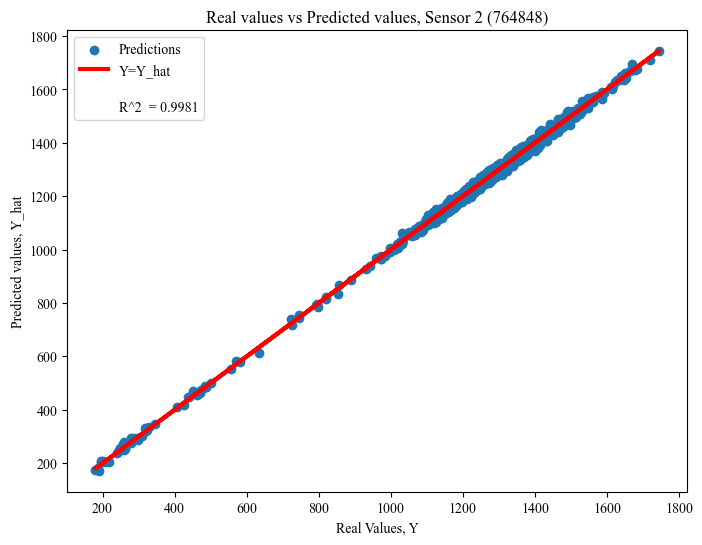

In [ ]:
# Plot the accuracy
plt.figure(figsize=(8, 6))

r2 = r2_score(y_2, y_hat_2)
print('r2: ', r2)

plt.scatter(y_2, y_hat_2, label='Predictions') # Scatter plot of real vs estimated y
plt.plot(y_2, y_2, color='red', linewidth = 3, label=f'Y=Y_hat') # Straight line on Y=Y
plt.scatter(y_2, y_2, marker='', label=f'\nR^2  = {r2:.4f}')

plt.xlabel('Real Values, Y')
plt.ylabel('Predicted values, Y_hat')
plt.title('Real values vs Predicted values, Sensor 2 (764848)')
plt.legend()

plt.show() 


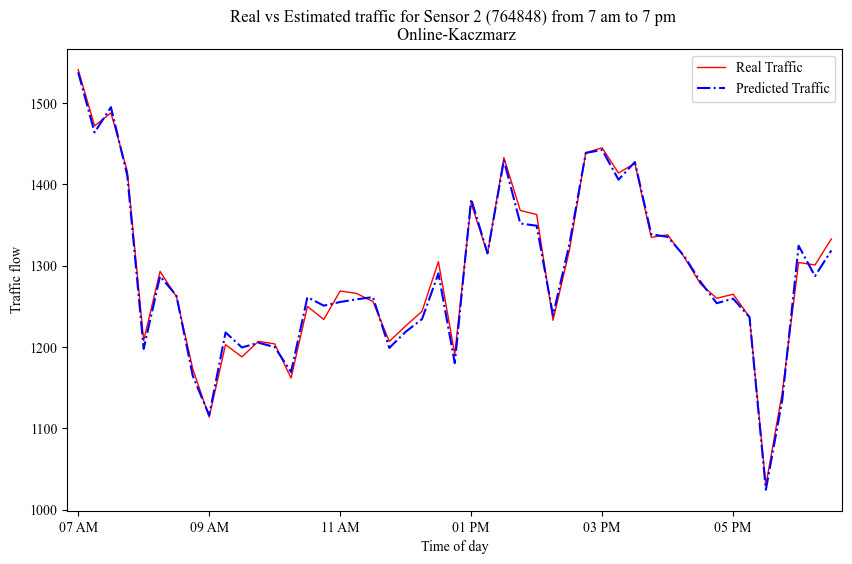

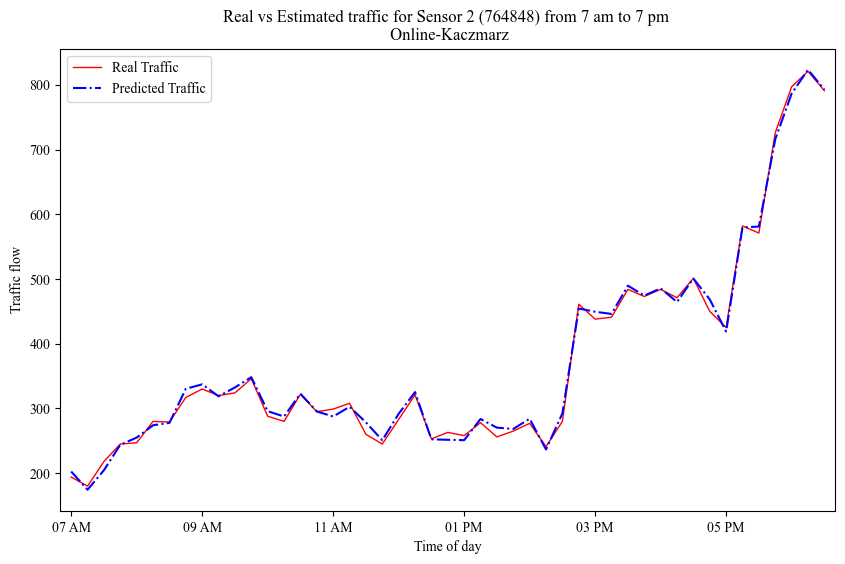

In [ ]:
## Day Before Ignition

# Extract data and generate time values
# n = int(t / days)
n = 28 # Corresponds to the 7 of November, 2018

num_entries = len(Y_2['Real_Values'][(48*(n-1)+1):48*(n)])
time_range = pd.date_range(start='7:00', end='19:00', freq='15min')
time_values = np.tile(time_range, num_entries // len(time_range) + 1)[:num_entries]

# Prepare plot data
plot_df = pd.DataFrame({
    'Time': time_values,
    'Real_Values': Y_2['Real_Values'][(48*(n-1)+1):48*(n)].values,
    'Predicted_Values': Y_2['Predicted_Values'][(48*(n-1)+1):48*(n)].values
})

# Plot data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot('Time', 'Real_Values', data=plot_df, linewidth=1, color='red', label='Real Traffic')
ax.plot('Time', 'Predicted_Values', data=plot_df, linestyle='dashdot', label='Predicted Traffic', color='b')

# Set x-axis format and locator
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Set x limits and titles
ax.set_xlim(plot_df['Time'].min() - pd.Timedelta(minutes=10), plot_df['Time'].max() + pd.Timedelta(minutes=10))
ax.set(xlabel='Time of day', ylabel='Traffic flow', title='Real vs Estimated traffic for Sensor 2 (764848) from 7 am to 7 pm \n Online-Kaczmarz')
ax.legend()

plt.savefig('./Figures/before ignition - Decrease.png')

plt.show()



## Day After Ignition

# Extract data and generate time values
# n = int(t / days)
n = 30 # Corresponds to the 9 of November, 2018

num_entries = len(Y_2['Real_Values'][(48*(n-1)+1):48*(n)])
time_range = pd.date_range(start='7:00', end='19:00', freq='15min')
time_values = np.tile(time_range, num_entries // len(time_range) + 1)[:num_entries]

# Prepare plot data
plot_df = pd.DataFrame({
    'Time': time_values,
    'Real_Values': Y_2['Real_Values'][(48*(n-1)+1):48*(n)].values,
    'Predicted_Values': Y_2['Predicted_Values'][(48*(n-1)+1):48*(n)].values
})

# Plot data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot('Time', 'Real_Values', data=plot_df, linewidth=1, color='red', label='Real Traffic')
ax.plot('Time', 'Predicted_Values', data=plot_df, linestyle='dashdot', label='Predicted Traffic', color='b')

# Set x-axis format and locator
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Set x limits and titles
ax.set_xlim(plot_df['Time'].min() - pd.Timedelta(minutes=10), plot_df['Time'].max() + pd.Timedelta(minutes=10))
ax.set(xlabel='Time of day', ylabel='Traffic flow', title='Real vs Estimated traffic for Sensor 2 (764848) from 7 am to 7 pm \n Online-Kaczmarz')
ax.legend()

plt.savefig('./Figures/after ignition - Decrease.png')

plt.show()

## 3. Sensor 764632 (traffic changes after fire)

### Load the data of the sensor of interest, and the m closest sensors.

In [ ]:
## m=4

sensor_3_ = pd.read_csv('./Data/sensor_interest_3 764632.txt')
print('sensor_3: ', sensor_3_.shape)

sensor_3_m_1_ = pd.read_csv('./Data/sensor_3_m_3 764958.txt')
sensor_3_m_2_ = pd.read_csv('./Data/sensor_3_m_6 764181.txt')
sensor_3_m_3_ = pd.read_csv('./Data/sensor_3_m_8 765100.txt')
sensor_3_m_4_ = pd.read_csv('./Data/sensor_3_m_11 760892.txt')

sensor_3:  (13248, 38)


### Filter out the measurements that are outside the time intervals of interest.
We want to see the measurements from   **_7 am to 7 pm_**

In [ ]:
# Ensure 'Time' column is in datetime format
sensor_3_['Time'] = pd.to_datetime(sensor_3_['Time'])
sensor_3_m_1_['Time'] = pd.to_datetime(sensor_3_m_1_['Time'])
sensor_3_m_2_['Time'] = pd.to_datetime(sensor_3_m_2_['Time'])
sensor_3_m_3_['Time'] = pd.to_datetime(sensor_3_m_3_['Time'])
sensor_3_m_4_['Time'] = pd.to_datetime(sensor_3_m_4_['Time'])

# Filter out data outside of 7 AM to 7 PM and data from weekends
sensor_3 = sensor_3_[(sensor_3_['Time'].dt.hour >= 7) & (sensor_3_['Time'].dt.hour < 19) & (sensor_3_['Time'].dt.dayofweek < 5)]
sensor_3_m_1 = sensor_3_m_1_[(sensor_3_m_1_['Time'].dt.hour >= 7) & (sensor_3_m_1_['Time'].dt.hour < 19) & (sensor_3_m_1_['Time'].dt.dayofweek < 5)]
sensor_3_m_2 = sensor_3_m_2_[(sensor_3_m_2_['Time'].dt.hour >= 7) & (sensor_3_m_2_['Time'].dt.hour < 19) & (sensor_3_m_2_['Time'].dt.dayofweek < 5)]
sensor_3_m_3 = sensor_3_m_3_[(sensor_3_m_3_['Time'].dt.hour >= 7) & (sensor_3_m_3_['Time'].dt.hour < 19) & (sensor_3_m_3_['Time'].dt.dayofweek < 5)]
sensor_3_m_4 = sensor_3_m_4_[(sensor_3_m_4_['Time'].dt.hour >= 7) & (sensor_3_m_4_['Time'].dt.hour < 19) & (sensor_3_m_4_['Time'].dt.dayofweek < 5)]

# Sort by time
sensor_3 = sensor_3.sort_values(by='Time')
sensor_3_m_1 = sensor_3_m_1.sort_values(by='Time')
sensor_3_m_2 = sensor_3_m_2.sort_values(by='Time')
sensor_3_m_3 = sensor_3_m_3.sort_values(by='Time')
sensor_3_m_4 = sensor_3_m_4.sort_values(by='Time')

# Reset the indices
sensor_3 = sensor_3.reset_index(drop=True)
sensor_3_m_1 = sensor_3_m_1.reset_index(drop=True)
sensor_3_m_2 = sensor_3_m_2.reset_index(drop=True)
sensor_3_m_3 = sensor_3_m_3.reset_index(drop=True)
sensor_3_m_4 = sensor_3_m_4.reset_index(drop=True)

print('sensor_3: ', sensor_3['Time'])
print('sensor_3_m_1: ', sensor_3_m_1.shape)
print('sensor_3_m_2: ', sensor_3_m_2.shape)
print('sensor_3_m_3: ', sensor_3_m_3.shape)
print('sensor_3_m_4: ', sensor_3_m_4.shape)

sensor_3:  0      2018-10-01 07:00:00
1      2018-10-01 07:05:00
2      2018-10-01 07:10:00
3      2018-10-01 07:15:00
4      2018-10-01 07:20:00
               ...        
4891   2018-11-15 18:35:00
4892   2018-11-15 18:40:00
4893   2018-11-15 18:45:00
4894   2018-11-15 18:50:00
4895   2018-11-15 18:55:00
Name: Time, Length: 4896, dtype: datetime64[ns]
sensor_3_m_1:  (4896, 38)
sensor_3_m_2:  (4896, 38)
sensor_3_m_3:  (4896, 38)
sensor_3_m_4:  (4896, 38)


In [ ]:
# Select only column '10' and convert to list to prepare for reshaping
sensor_3_10 = sensor_3['10'].tolist()
sensor_3_m_1_10 = sensor_3_m_1['10'].tolist()
sensor_3_m_2_10 = sensor_3_m_2['10'].tolist()
sensor_3_m_3_10 = sensor_3_m_3['10'].tolist()
sensor_3_m_4_10 = sensor_3_m_4['10'].tolist()

# Ensure each list is of length divisible by 3 by trimming
sensor_3_10 = trim_to_multiple(sensor_3_10, 3)
sensor_3_m_1_10 = trim_to_multiple(sensor_3_m_1_10, 3)
sensor_3_m_2_10 = trim_to_multiple(sensor_3_m_2_10, 3)
sensor_3_m_3_10 = trim_to_multiple(sensor_3_m_3_10, 3)
sensor_3_m_4_10 = trim_to_multiple(sensor_3_m_4_10, 3)

# Reshape list and convert back to DataFrame, then sum every 3 rows
sensor_3 = pd.DataFrame(np.array(sensor_3_10).reshape(-1,3)).sum(axis=1)
sensor_3_m_1 = pd.DataFrame(np.array(sensor_3_m_1_10).reshape(-1,3)).sum(axis=1)
sensor_3_m_2 = pd.DataFrame(np.array(sensor_3_m_2_10).reshape(-1,3)).sum(axis=1)
sensor_3_m_3 = pd.DataFrame(np.array(sensor_3_m_3_10).reshape(-1,3)).sum(axis=1)
sensor_3_m_4 = pd.DataFrame(np.array(sensor_3_m_4_10).reshape(-1,3)).sum(axis=1)

print('sensor_3_10: ', sensor_3.shape)
print('sensor_3_m_1_10: ', sensor_3_m_1.shape)
print('sensor_3_m_2_10: ', sensor_3_m_2.shape)
print('sensor_3_m_3_10: ', sensor_3_m_3.shape)
print('sensor_3_m_4_10: ', sensor_3_m_4.shape)


sensor_3_10:  (1632,)
sensor_3_m_1_10:  (1632,)
sensor_3_m_2_10:  (1632,)
sensor_3_m_3_10:  (1632,)
sensor_3_m_4_10:  (1632,)


### Generate the matrix as per the specifications in the paper.
Each row will have the measurements of traffic from the sensor of interest and the m-closest sensors.
- The rows will include traffic information of the t-1, t-2,..., t-r observations.
- The rows are organized by sensor, and by timestep: 
<br><br>[sensor of interest @ t-1,...,sensor of interest @ t-r, ... , m-closest sensor @ t-1,...,m-closest sensor @ t-r]

In [ ]:
r = 3  # set r to any value

# Minimum number of rows across all dataframes
min_rows = min(sensor_3.shape[0], sensor_3_m_1.shape[0], sensor_3_m_2.shape[0], sensor_3_m_3.shape[0], sensor_3_m_4.shape[0])

# Initialize an empty list to store all row vectors
row_vectors = []

# Iterate over each index from r to min_rows
for i in tqdm(range(r, min_rows-1)):
    # Generate a list of indexes you're interested in. In this case, it's [i-r, i-r+1, ..., i]
    
    # ind = list(range(i-r, i+1))
    # indexes = list(range(i-r+1, i+1))
    
    ind = list(range(i+1, i-r, -1))
    indexes = list(range(i, i-r, -1))

    
    # Get the desired elements
    sensor_3_traffic = sensor_3.loc[ind].values
    sensor_3_m_1_traffic = sensor_3_m_1.loc[indexes].values
    sensor_3_m_2_traffic = sensor_3_m_2.loc[indexes].values
    sensor_3_m_3_traffic = sensor_3_m_3.loc[indexes].values
    sensor_3_m_4_traffic = sensor_3_m_4.loc[indexes].values
    
    # Concatenate them into a 1xr*5 row vector
    row_vector = np.concatenate([sensor_3_traffic, sensor_3_m_1_traffic, sensor_3_m_2_traffic, sensor_3_m_3_traffic, sensor_3_m_4_traffic])
    
    # Append the row vector to our list
    row_vectors.append(row_vector)

# Convert our list of row vectors into a 2D numpy array
traffic_764632 = pd.DataFrame(row_vectors)
traffic_764632

100%|██████████| 1628/1628 [00:02<00:00, 637.02it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1595.0,1560.0,1586.0,1559.0,1550.0,1508.0,1566.0,1289.0,1362.0,1390.0,1766.0,1823.0,1764.0,1364.0,1417.0,1432.0
1,1791.0,1595.0,1560.0,1586.0,1601.0,1550.0,1508.0,1237.0,1289.0,1362.0,1770.0,1766.0,1823.0,1325.0,1364.0,1417.0
2,1637.0,1791.0,1595.0,1560.0,1504.0,1601.0,1550.0,1098.0,1237.0,1289.0,2046.0,1770.0,1766.0,1146.0,1325.0,1364.0
3,1540.0,1637.0,1791.0,1595.0,1418.0,1504.0,1601.0,1098.0,1098.0,1237.0,1821.0,2046.0,1770.0,1334.0,1146.0,1325.0
4,1356.0,1540.0,1637.0,1791.0,1516.0,1418.0,1504.0,1059.0,1098.0,1098.0,1749.0,1821.0,2046.0,1205.0,1334.0,1146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1109.0,1128.0,1071.0,1308.0,1207.0,1297.0,1238.0,1306.0,1317.0,1345.0,1324.0,1347.0,1574.0,1478.0,1349.0,1422.0
1624,1102.0,1109.0,1128.0,1071.0,1201.0,1207.0,1297.0,1267.0,1306.0,1317.0,1289.0,1324.0,1347.0,1217.0,1478.0,1349.0
1625,1034.0,1102.0,1109.0,1128.0,1092.0,1201.0,1207.0,1346.0,1267.0,1306.0,1242.0,1289.0,1324.0,1183.0,1217.0,1478.0
1626,1043.0,1034.0,1102.0,1109.0,1010.0,1092.0,1201.0,1241.0,1346.0,1267.0,1150.0,1242.0,1289.0,1137.0,1183.0,1217.0


### Tests - Sensor 764632

#### Estimation

In [ ]:

################################################################################################
####    Definition of "Hyperparameters"
################################################################################################

t = 48*30 # 48 = amount of data per day, 30 = 11/09/2018 
# t = traffic_737433.shape[0]

X = traffic_764632.iloc[:t, 1:]

"""
    Update this if using more input variables, # the function is handling a 15-dimensional, second order polynomial.
"""

polynomial_degree = 2
"""
    USING Total (vs. Max) EXPANCTION TERMS
    Number of terms in the weights matrix: 

"""


target_values = traffic_764632.iloc[:t, 0]     
# Generate Y as target_values (real Y's)

# Initialize weights and estimations 
weights_over_time = []
y_hat = []


noise = np.random.normal(scale= 10 , size=(t))

################################################################################################
####    Online estimation of coefficients
################################################################################################


for i in tqdm(range(t)):
    x_i = X.iloc[i, :]

    # Normalize and scale to -1,1 the input:
    x_i = ( x_i - x_i.min() ) / ( x_i.max() - x_i.min() )*2 - 1
    
    if i == 0:
        weight_predictions, _ = online_kaczmarz_legendre_multiple(x_i, [target_values[i] + noise[i]], polynomial_degree)
    
    else:
        weight_predictions, _ = online_kaczmarz_legendre_multiple(x_i, [target_values[i] + noise[i]], polynomial_degree, weights_over_time[i-1])


    #De-normalize rescale the weights:
    weight_predictions = (((weight_predictions + 1) / 2)  * ( x_i.max() - x_i.min() ) + x_i.min() )

    # Use predicted weights to compute y_hat
    y_predictions = generate_multi_legendre_design_matrix(x_i, polynomial_degree) @ weight_predictions.T 

    # Store the values of predicted y and estimated weights
    y_hat.append(y_predictions)
    weights_over_time.append(weight_predictions)

print("Done carajo")

100%|██████████| 1440/1440 [1:00:42<00:00,  2.53s/it]

Done carajo


In [ ]:
weights_over_time_3 = np.array(weights_over_time)
weights_over_time_3.to_csv('./Data'+ 'weights_over_time_3.csv')

y_hat_3 = np.array(y_hat).flatten() #########
y_hat_3.to_csv('./Data'+ 'y_hat_3.csv')

print('y_hat: ', y_hat_3.shape)
print('weights_over_time: ', weights_over_time_3.shape)

weights_over_time_3[-1]
print('Weights: ', weights_over_time_3[-1].shape)

y_hat:  (1440,)
weights_over_time:  (1440, 136)
Weights:  (136,)


#### Results

In [ ]:
################################################################################################
####    Results
################################################################################################

print('Predicted_Values: ', y_hat_3.shape)

y_3 = traffic_764632.iloc[:t, 0] 
print('Real_Values: ', y_3.shape)

Y_3 = pd.DataFrame({
    'Predicted_Values': y_hat_3,
    'Real_Values': y_3,
    'Difference': (y_3-y_hat_3).T
})

# Style DataFrame
Y_3[-10:].style.format("{:.4f}")

Predicted_Values:  (1440,)
Real_Values:  (1440,)


,Predicted_Values,Real_Values,Difference
1430,178.4092,180.0000,1.5908
1431,217.4663,186.0000,-31.4663
1432,174.3201,172.0000,-2.3201
1433,195.4176,163.0000,-32.4176
1434,195.2308,185.0000,-10.2308
1435,178.1918,165.0000,-13.1918
1436,1505.6204,1492.0000,-13.6204
1437,1712.2262,1702.0000,-10.2262
1438,1567.9633,1560.0000,-7.9633
1439,1502.4777,1506.0000,3.5223


#### Plots

r2:  0.9978275563952874


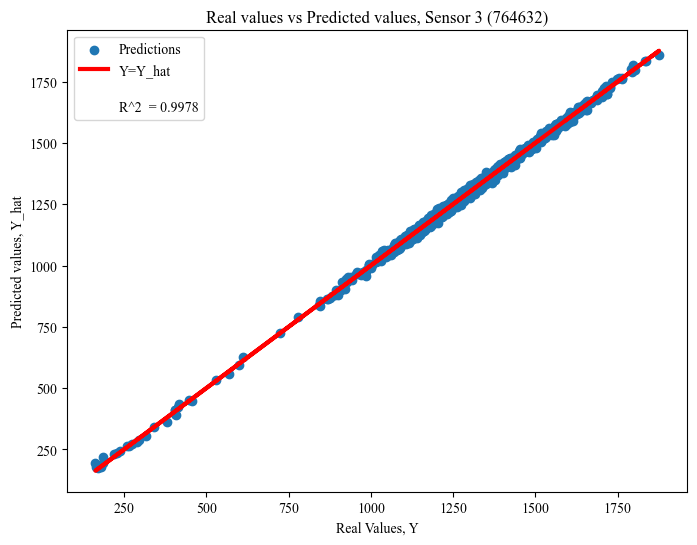

In [ ]:
# Plot the accuracy
plt.figure(figsize=(8, 6))

r2 = r2_score(y_3, y_hat_3)
print('r2: ', r2)

plt.scatter(y_3, y_hat_3, label='Predictions') # Scatter plot of real vs estimated y
plt.plot(y_3, y_3, color='red', linewidth = 3, label=f'Y=Y_hat') # Straight line on Y=Y
plt.scatter(y_3, y_3, marker='', label=f'\nR^2  = {r2:.4f}')

plt.xlabel('Real Values, Y')
plt.ylabel('Predicted values, Y_hat')
plt.title('Real values vs Predicted values, Sensor 3 (764632)')
plt.legend()

plt.show() 


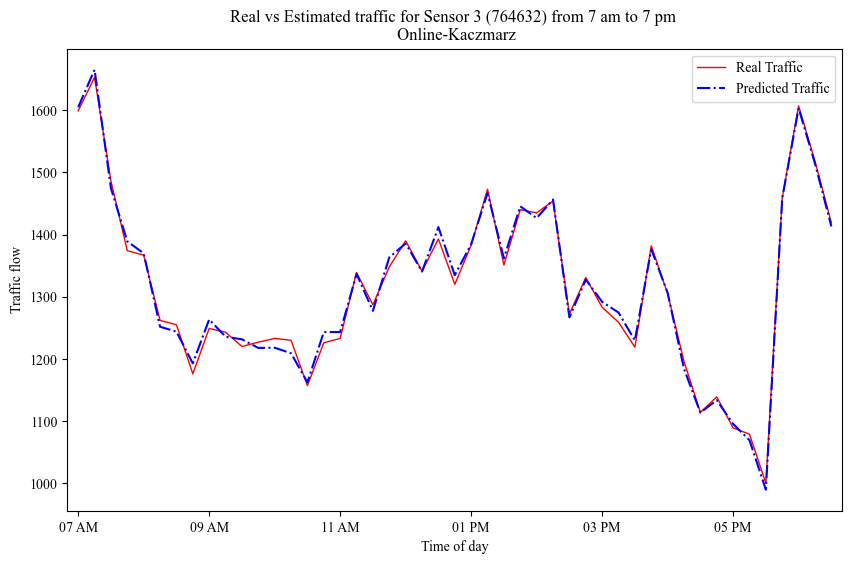

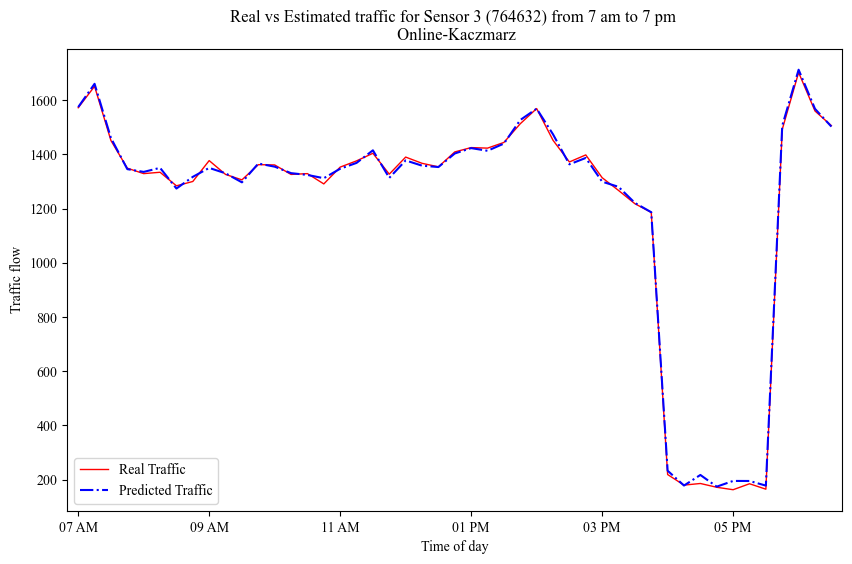

In [ ]:
## Day Before Ignition

# Extract data and generate time values
# n = int(t / days)
n = 28 # Corresponds to the 7 of November, 2018

num_entries = len(Y_3['Real_Values'][(48*(n-1)+1):48*(n)])
time_range = pd.date_range(start='7:00', end='19:00', freq='15min')
time_values = np.tile(time_range, num_entries // len(time_range) + 1)[:num_entries]

# Prepare plot data
plot_df = pd.DataFrame({
    'Time': time_values,
    'Real_Values': Y_3['Real_Values'][(48*(n-1)+1):48*(n)].values,
    'Predicted_Values': Y_3['Predicted_Values'][(48*(n-1)+1):48*(n)].values
})

# Plot data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot('Time', 'Real_Values', data=plot_df, linewidth=1, color='red', label='Real Traffic')
ax.plot('Time', 'Predicted_Values', data=plot_df, linestyle='dashdot', label='Predicted Traffic', color='b')

# Set x-axis format and locator
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Set x limits and titles
ax.set_xlim(plot_df['Time'].min() - pd.Timedelta(minutes=10), plot_df['Time'].max() + pd.Timedelta(minutes=10))
ax.set(xlabel='Time of day', ylabel='Traffic flow', title='Real vs Estimated traffic for Sensor 3 (764632) from 7 am to 7 pm \n Online-Kaczmarz')
ax.legend()

plt.savefig('./Figures/before ignition - Change.png')

plt.show()



## Day After Ignition

# Extract data and generate time values
# n = int(t / days)
n = 30 # Corresponds to the 7 of November, 2018

num_entries = len(Y_3['Real_Values'][(48*(n-1)+1):48*(n)])
time_range = pd.date_range(start='7:00', end='19:00', freq='15min')
time_values = np.tile(time_range, num_entries // len(time_range) + 1)[:num_entries]

# Prepare plot data
plot_df = pd.DataFrame({
    'Time': time_values,
    'Real_Values': Y_3['Real_Values'][(48*(n-1)+1):48*(n)].values,
    'Predicted_Values': Y_3['Predicted_Values'][(48*(n-1)+1):48*(n)].values
})

# Plot data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot('Time', 'Real_Values', data=plot_df, linewidth=1, color='red', label='Real Traffic')
ax.plot('Time', 'Predicted_Values', data=plot_df, linestyle='dashdot', label='Predicted Traffic', color='b')


# Set x-axis format and locator
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Set x limits and titles
ax.set_xlim(plot_df['Time'].min() - pd.Timedelta(minutes=10), plot_df['Time'].max() + pd.Timedelta(minutes=10))
ax.set(xlabel='Time of day', ylabel='Traffic flow', title='Real vs Estimated traffic for Sensor 3 (764632) from 7 am to 7 pm \n Online-Kaczmarz')
ax.legend()

plt.savefig('./Figures/after ignition - Change.png')

plt.show()